# Experiment malware detection for CTU-50

In [8]:
%load_ext autoreload
%autoreload 2

#import tensorflow
import pandas as pd
#from zat import zeek_log_reader
import pprint
#from zat.log_to_dataframe import LogToDataFrame
from matplotlib import pyplot as plt
import sklearn

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelBinarizer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setting ML Flow

In [9]:
# Fix cuda error
import os
os.environ['XLA_FLAGS']="--xla_gpu_cuda_data_dir=/usr/lib/cuda"

## Fixing the seeds

In [10]:
global_seed = 42
np.random.seed(global_seed)

## Load data

In [11]:
# load all data
df_1_1 = pd.read_csv('ctu-50-features/Client1/Day1/comb_features.csv')
df_1_1['client'] = 1
df_1_1['client_day'] = 1
df_1_2 = pd.read_csv('ctu-50-features/Client1/Day2/comb_features.csv')
df_1_2['client'] = 1
df_1_2['client_day'] = 2
df_1_3 = pd.read_csv('ctu-50-features/Client1/Day3/comb_features.csv')
df_1_3['client'] = 1
df_1_3['client_day'] = 3
df_1_4 = pd.read_csv('ctu-50-features/Client1/Day4/comb_features.csv')
df_1_4['client'] = 1
df_1_4['client_day'] = 4
df_1_5 = pd.read_csv('ctu-50-features/Client1/Day5/comb_features.csv')
df_1_5['client'] = 1
df_1_5['client_day'] = 5

df_2_1 = pd.read_csv('ctu-50-features/Client2/Day1/comb_features.csv')
df_2_1['client'] = 2
df_2_1['client_day'] = 1
df_2_2 = pd.read_csv('ctu-50-features/Client2/Day2/comb_features.csv')
df_2_2['client'] = 2
df_2_2['client_day'] = 2
df_2_3 = pd.read_csv('ctu-50-features/Client2/Day3/comb_features.csv')
df_2_3['client'] = 2
df_2_3['client_day'] = 3
df_2_4 = pd.read_csv('ctu-50-features/Client2/Day4/comb_features.csv')
df_2_4['client'] = 2
df_2_4['client_day'] = 4
df_2_5 = pd.read_csv('ctu-50-features/Client2/Day5/comb_features.csv')
df_2_5['client'] = 2
df_2_5['client_day'] = 5

df_3_1 = pd.read_csv('ctu-50-features/Client3/Day1/comb_features.csv')
df_3_1['client'] = 3
df_3_1['client_day'] = 1
df_3_2 = pd.read_csv('ctu-50-features/Client3/Day2/comb_features.csv')
df_3_2['client'] = 3
df_3_2['client_day'] = 2
df_3_3 = pd.read_csv('ctu-50-features/Client3/Day3/comb_features.csv')
df_3_3['client'] = 3
df_3_3['client_day'] = 3
df_3_4 = pd.read_csv('ctu-50-features/Client3/Day4/comb_features.csv')
df_3_4['client'] = 3
df_3_4['client_day'] = 4
df_3_5 = pd.read_csv('ctu-50-features/Client3/Day5/comb_features.csv')
df_3_5['client'] = 3
df_3_5['client_day'] = 5

df_4_1 = pd.read_csv('ctu-50-features/Client4/Day1/comb_features.csv')
df_4_1['client'] = 4
df_4_1['client_day'] = 1
df_4_2 = pd.read_csv('ctu-50-features/Client4/Day2/comb_features.csv')
df_4_2['client'] = 4
df_4_2['client_day'] = 2
df_4_3 = pd.read_csv('ctu-50-features/Client4/Day3/comb_features.csv')
df_4_3['client'] = 4
df_4_3['client_day'] = 3
df_4_4 = pd.read_csv('ctu-50-features/Client4/Day4/comb_features.csv')
df_4_4['client'] = 4
df_4_4['client_day'] = 4
df_4_5 = pd.read_csv('ctu-50-features/Client4/Day5/comb_features.csv')
df_4_5['client'] = 4
df_4_5['client_day'] = 5

df_5_1 = pd.read_csv('ctu-50-features/Client5/Day1/comb_features.csv')
df_5_1['client'] = 5
df_5_1['client_day'] = 1
df_5_2 = pd.read_csv('ctu-50-features/Client5/Day2/comb_features.csv')
df_5_2['client'] = 5
df_5_2['client_day'] = 2
df_5_3 = pd.read_csv('ctu-50-features/Client5/Day3/comb_features.csv')
df_5_3['client'] = 5
df_5_3['client_day'] = 3
df_5_4 = pd.read_csv('ctu-50-features/Client5/Day4/comb_features.csv')
df_5_4['client'] = 5
df_5_4['client_day'] = 4
df_5_5 = pd.read_csv('ctu-50-features/Client5/Day5/comb_features.csv')
df_5_5['client'] = 5
df_5_5['client_day'] = 5

df_6_1 = pd.read_csv('ctu-50-features/Client6/Day1/comb_features.csv')
df_6_1['client'] = 6
df_6_1['client_day'] = 1
df_6_2 = pd.read_csv('ctu-50-features/Client6/Day2/comb_features.csv')
df_6_2['client'] = 6
df_6_2['client_day'] = 2
df_6_3 = pd.read_csv('ctu-50-features/Client6/Day3/comb_features.csv')
df_6_3['client'] = 6
df_6_3['client_day'] = 3
df_6_4 = pd.read_csv('ctu-50-features/Client6/Day4/comb_features.csv')
df_6_4['client'] = 6
df_6_4['client_day'] = 4
df_6_5 = pd.read_csv('ctu-50-features/Client6/Day5/comb_features.csv')
df_6_5['client'] = 6
df_6_5['client_day'] = 5

df_7_1 = pd.read_csv('ctu-50-features/Client7/Day1/comb_features.csv')
df_7_1['client'] = 7
df_7_1['client_day'] = 1
df_7_2 = pd.read_csv('ctu-50-features/Client7/Day2/comb_features.csv')
df_7_2['client'] = 7
df_7_2['client_day'] = 2
df_7_3 = pd.read_csv('ctu-50-features/Client7/Day3/comb_features.csv')
df_7_3['client'] = 7
df_7_3['client_day'] = 3
df_7_4 = pd.read_csv('ctu-50-features/Client7/Day4/comb_features.csv')
df_7_4['client'] = 7
df_7_4['client_day'] = 4
df_7_5 = pd.read_csv('ctu-50-features/Client7/Day5/comb_features.csv')
df_7_5['client'] = 7
df_7_5['client_day'] = 5

df_8_1 = pd.read_csv('ctu-50-features/Client8/Day1/comb_features.csv')
df_8_1['client'] = 8
df_8_1['client_day'] = 1
df_8_2 = pd.read_csv('ctu-50-features/Client8/Day2/comb_features.csv')
df_8_2['client'] = 8
df_8_2['client_day'] = 2
df_8_3 = pd.read_csv('ctu-50-features/Client8/Day3/comb_features.csv')
df_8_3['client'] = 8
df_8_3['client_day'] = 3
df_8_4 = pd.read_csv('ctu-50-features/Client8/Day4/comb_features.csv')
df_8_4['client'] = 8
df_8_4['client_day'] = 4
df_8_5 = pd.read_csv('ctu-50-features/Client8/Day5/comb_features.csv')
df_8_5['client'] = 8
df_8_5['client_day'] = 5

df_9_1 = pd.read_csv('ctu-50-features/Client9/Day1/comb_features.csv')
df_9_1['client'] = 9
df_9_1['client_day'] = 1
df_9_2 = pd.read_csv('ctu-50-features/Client9/Day2/comb_features.csv')
df_9_2['client'] = 9
df_9_2['client_day'] = 2
df_9_3 = pd.read_csv('ctu-50-features/Client9/Day3/comb_features.csv')
df_9_3['client'] = 9
df_9_3['client_day'] = 3
df_9_4 = pd.read_csv('ctu-50-features/Client9/Day4/comb_features.csv')
df_9_4['client'] = 9
df_9_4['client_day'] = 4
df_9_5 = pd.read_csv('ctu-50-features/Client9/Day5/comb_features.csv')
df_9_5['client'] = 9
df_9_5['client_day'] = 5

df_10_1 = pd.read_csv('ctu-50-features/Client10/Day1/comb_features.csv')
df_10_1['client'] = 10
df_10_1['client_day'] = 1
df_10_2 = pd.read_csv('ctu-50-features/Client10/Day2/comb_features.csv')
df_10_2['client'] = 10
df_10_2['client_day'] = 2
df_10_3 = pd.read_csv('ctu-50-features/Client10/Day3/comb_features.csv')
df_10_3['client'] = 10
df_10_3['client_day'] = 3
df_10_4 = pd.read_csv('ctu-50-features/Client10/Day4/comb_features.csv')
df_10_4['client'] = 10
df_10_4['client_day'] = 4
df_10_5 = pd.read_csv('ctu-50-features/Client10/Day5/comb_features.csv')
df_10_5['client'] = 10
df_10_5['client_day'] = 5

df_m1_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-219-2/Day1/comb_features.csv')
df_m1_1['client'] = 11
df_m1_1['client_day'] = 1

df_m2_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-230-1/Day1/comb_features.csv')
df_m2_1['client'] = 12
df_m2_1['client_day'] = 1

df_m3_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day1/comb_features.csv')
df_m3_1['client'] = 13
df_m3_1['client_day'] = 1
df_m3_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day2/comb_features.csv')
df_m3_2['client'] = 13
df_m3_2['client_day'] = 2
df_m3_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day3/comb_features.csv')
df_m3_3['client'] = 13
df_m3_3['client_day'] = 3
df_m3_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day4/comb_features.csv')
df_m3_4['client'] = 13
df_m3_4['client_day'] = 4
df_m3_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day5/comb_features.csv')
df_m3_5['client'] = 13
df_m3_5['client_day'] = 5

df_m4_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day1/comb_features.csv')
df_m4_1['client'] = 14
df_m4_1['client_day'] = 1
df_m4_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day2/comb_features.csv')
df_m4_2['client'] = 14
df_m4_2['client_day'] = 2
df_m4_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day3/comb_features.csv')
df_m4_3['client'] = 14
df_m4_3['client_day'] = 3
df_m4_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day4/comb_features.csv')
df_m4_4['client'] = 14
df_m4_4['client_day'] = 4
df_m4_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day5/comb_features.csv')
df_m4_5['client'] = 14
df_m4_5['client_day'] = 5

df_m5_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day1/comb_features.csv')
df_m5_1['client'] = 15
df_m5_1['client_day'] = 1
df_m5_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day2/comb_features.csv')
df_m5_2['client'] = 15
df_m5_2['client_day'] = 2
df_m5_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day3/comb_features.csv')
df_m5_3['client'] = 15
df_m5_3['client_day'] = 3
df_m5_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day4/comb_features.csv')
df_m5_4['client'] = 15
df_m5_4['client_day'] = 4
df_m5_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day5/comb_features.csv')
df_m5_5['client'] = 15
df_m5_5['client_day'] = 5

df_m6_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day1/comb_features.csv')
df_m6_1['client'] = 16
df_m6_1['client_day'] = 1
df_m6_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day2/comb_features.csv')
df_m6_2['client'] = 16
df_m6_2['client_day'] = 2
df_m6_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day3/comb_features.csv')
df_m6_3['client'] = 16
df_m6_3['client_day'] = 3
df_m6_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day4/comb_features.csv')
df_m6_4['client'] = 16
df_m6_4['client_day'] = 4
df_m6_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day5/comb_features.csv')
df_m6_5['client'] = 16
df_m6_5['client_day'] = 5

In [12]:
# Get all the benign together 
df_1 = pd.concat([df_1_1, df_1_2, df_1_3, df_1_4, df_1_5])
df_1.reset_index(inplace=True)
df_2 = pd.concat([df_2_1, df_2_2, df_2_3, df_2_4, df_2_5])
df_2.reset_index(inplace=True)
df_3 = pd.concat([df_3_1, df_3_2, df_3_3, df_3_4, df_3_5])
df_3.reset_index(inplace=True)
df_4 = pd.concat([df_4_1, df_4_2, df_4_3, df_4_4, df_4_5])
df_4.reset_index(inplace=True)
df_5 = pd.concat([df_5_1, df_5_2, df_5_3, df_5_4, df_5_5])
df_5.reset_index(inplace=True)
df_6 = pd.concat([df_6_1, df_6_2, df_6_3, df_6_4, df_6_5])
df_6.reset_index(inplace=True)
df_7 = pd.concat([df_7_1, df_7_2, df_7_3, df_7_4, df_7_5])
df_7.reset_index(inplace=True)
df_8 = pd.concat([df_8_1, df_8_2, df_8_3, df_8_4, df_8_5])
df_8.reset_index(inplace=True)
df_9 = pd.concat([df_9_1, df_9_2, df_9_3, df_9_4, df_9_5])
df_9.reset_index(inplace=True)
df_10 = pd.concat([df_10_1, df_10_2, df_10_3, df_10_4, df_10_5])
df_10.reset_index(inplace=True)

# Get the malware together
df_m1 = pd.concat([df_m1_1])
df_m1.reset_index(inplace=True)
df_m2 = pd.concat([df_m2_1])
df_m2.reset_index(inplace=True)
df_m3 = pd.concat([df_m3_1, df_m3_2, df_m3_3, df_m3_4, df_m3_4])
df_m3.reset_index(inplace=True)
df_m4 = pd.concat([df_m4_1, df_m4_2, df_m4_3, df_m4_4, df_m4_4])
df_m4.reset_index(inplace=True)
df_m5 = pd.concat([df_m5_1, df_m5_2, df_m5_3, df_m5_4, df_m5_4])
df_m5.reset_index(inplace=True)
df_m6 = pd.concat([df_m6_1, df_m6_2, df_m6_3, df_m6_4, df_m6_4])
df_m6.reset_index(inplace=True)

### Load all data together in one DF

In [13]:
# Get all datasets together
df_all = pd.DataFrame() 
# Get all the benign together 
df_all = pd.concat([df_1_1, df_1_2, df_1_3, df_1_4, df_1_5, df_2_1, df_2_2, df_2_3, df_2_4, df_2_5, df_3_1, df_3_2, df_3_3, df_3_4, df_3_5, df_4_1, df_4_2, df_4_3, df_4_4, df_4_5, df_5_1, df_5_2, df_5_3, df_5_4, df_5_5, df_6_1, df_6_2, df_6_3, df_6_4, df_6_5, df_7_1, df_7_2, df_7_3, df_7_4, df_7_5, df_8_1, df_8_2, df_8_3, df_8_4, df_8_5, df_9_1, df_9_2, df_9_3, df_9_4, df_9_5, df_10_1, df_10_2, df_10_3, df_10_4, df_10_5, df_m1_1, df_m2_1, df_m3_1, df_m3_2, df_m3_3, df_m3_4, df_m3_4, df_m4_1, df_m4_2, df_m4_3, df_m4_4, df_m4_4, df_m5_1, df_m5_2, df_m5_3, df_m5_4, df_m5_4, df_m6_1, df_m6_2, df_m6_3, df_m6_4, df_m6_4 ])

df_all.reset_index(inplace=True)

## Data Analysis

### Analyze data with Pair plots

In [6]:
# only in df_1_1
sub_df = df_1_1[['num_flows', 
             'avg_dur', 
             'std_dev_dur',
             'percent_stdev_dur',
             'total_size_of_flows_orig', 
             'total_size_of_flows_resp', 
             'ratio_of_sizes',
             'percent_of_established_states',
             'inbound_pckts',
             'outbound_pckts',
             'periodicity_avg',
             'periodicity_stdev',
             'ssl_ratio',
             'average_public_key',
             'tls_version_ratio',
             'avg_cert_length',
             'is_valid_certificate_during_capture',
             'amount_diff_certificates',
             'num_domains_in_cert',
             'cert_ratio',
             'num_certificate_path',
             'x509_ssl_ratio',
             'SNI_ssl_ratio',
             'self_signed_ratio',
             'is_SNIs_in_SNA_dns', 
             'SNI_equal_DstIP',
             'is_CNs_in_SNA_dns', 
             'ratio_of_differ_SNI_in_ssl_log',
             'ratio_of_differ_subject_in_ssl_log',
             'ratio_of_differ_issuer_in_ssl_log', 
             'ratio_of_differ_subject_in_cert',
             'ratio_of_differ_issuer_in_cert', 
             'ratio_of_differ_sandns_in_cert',
             'ratio_of_same_subjects', 
             'ratio_of_same_issuer',
             'ratio_is_same_CN_and_SNI', 
             'avg_certificate_exponent',
             'is_SNI_in_top_level_domain', 
             'ratio_certificate_path_error',
             'ratio_missing_cert_in_cert_path', 
             'label', 
             'detailedlabel',
             'id.orig_h', 
             'id.resp_h', 
             'id.resp_p', 
             'proto', 
             'day', 
             'hour'
             ]]


In [19]:
# plot pair plot histograms
import seaborn as sns
sns.pairplot(sub_df)

# see images directory

### Correlation analysis

In [11]:
# test to Delete the correlated features
# Get correlated matrix
cor_matrix = df_1_1.corr().abs()
# Get the upper triangle of the matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
# Find columns to drop if they have more than .95 correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# drop
df_client1_nocorr = df_1_1.drop(df_1_1[to_drop], axis=1)

/tmp/ipykernel_1589728/3910169409.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



###  Describe data frame

In [16]:
# show display better
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
#pd.reset_option('display.max_columns')
#pd.reset_option('display.precision')

In [18]:
df_1.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,1849.00,1849.00,1.85e+03,1.85e+03,1849.00,1849.00,1.85e+03,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.0,1849.0,1849.00,1.85e+03,1849.00,1.85e+03,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1.85e+03,1849.0,1849.0,1849,1849,1849,1849,1849.00,1849,1849.00,1849.00,1849.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,8,169,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Microsoft,147.32.81.x0,20.54.24.246,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818,1425,1840,107,NaN,1840,NaN,NaN,NaN
mean,184.98,1.93,1.23e+02,7.58e+00,0.12,14323.93,1.08e+04,2.26,0.95,41.36,51.80,67.41,15.25,0.23,109.69,0.32,75.26,-0.79,-0.79,0.21,-0.56,-0.65,1.15,0.16,1.0,0.0,-0.59,-1.62e-03,-0.58,7.61e-03,0.08,0.08,-0.79,-0.79,-0.79,-0.76,-0.76,-0.78,2090.44,5.77e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,457.53,NaN,3.07,11.39,1.0
std,107.79,1.30,2.67e+02,2.82e+01,0.21,32830.28,1.05e+05,4.85,0.17,54.03,62.43,243.56,88.48,0.53,365.28,0.43,148.76,0.41,0.41,0.41,0.88,0.69,0.32,0.33,0.0,0.0,0.80,4.03e-02,0.81,8.21e-02,0.23,0.23,0.41,0.41,0.41,0.48,0.48,0.44,11521.93,7.04e-02,0.0,0.0,NaN,NaN,NaN,NaN,262.01,NaN,1.41,7.18,0.0
min,0.00,1.00,3.00e-06,0.00e+00,0.00,195.00,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,0.00,1.0
25%,92.00,1.00,5.06e-01,0.00e+00,0.00,2311.00,4.48e+03,1.15,1.00,14.00,18.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,5.00,1.0
50%,184.00,2.00,8.73e-01,6.34e-04,0.00,3216.00,6.20e+03,2.10,1.00,22.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,11.00,1.0
75%,277.00,2.00,9.35e+01,1.11e-01,0.25,6086.00,9.72e+03,2.36,1.00,44.00,56.00,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,18.00,1.0


In [19]:
df_2.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,3143.00,3143.00,3.14e+03,3143.00,3143.00,3.14e+03,3.14e+03,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.0,3143.00,3.14e+03,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.0,3143,3143,3143,3143,3143.00,3143,3143.00,3143.00,3143.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,9,1204,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x8,34.225.190.52,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3126,2640,3133,37,NaN,3127,NaN,NaN,NaN
mean,338.47,4.16,2.59e+02,52.05,0.14,7.43e+04,7.41e+05,26.16,0.92,584.02,443.64,117.63,38.84,0.36,91.1,0.61,20.99,-0.94,-0.94,0.06,-0.70,-0.92,1.05,0.04,1.0,0.0,-0.90,-9.55e-04,-0.88,0.06,0.01,0.01,-0.94,-0.94,-0.94,-0.93,-0.93,-0.93,2751.49,0.02,-1.0,-1.0,NaN,NaN,NaN,NaN,488.10,NaN,3.14,10.95,2.0
std,221.06,21.83,1.12e+03,260.79,0.20,1.42e+06,1.61e+07,193.45,0.20,14389.71,8753.60,346.04,129.14,0.75,422.3,0.44,89.45,0.30,0.23,0.24,2.03,0.34,0.26,0.18,0.0,0.0,0.43,3.09e-02,0.47,0.21,0.09,0.09,0.24,0.23,0.24,0.30,0.30,0.29,13122.00,0.11,0.0,0.0,NaN,NaN,NaN,NaN,769.36,NaN,1.55,3.07,0.0
min,0.00,1.00,2.00e-06,0.00,0.00,7.20e+01,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.0,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,2.00,2.0
25%,157.00,1.00,1.28e+01,0.00,0.00,1.88e+03,6.21e+03,1.16,1.00,24.00,26.00,-1.00,-1.00,0.00,-1.0,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,9.00,2.0
50%,314.00,2.00,6.03e+01,0.02,0.00,4.47e+03,1.07e+04,2.48,1.00,45.00,46.00,-1.00,-1.00,0.00,-1.0,0.88,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,12.00,2.0
75%,486.50,3.00,2.07e+02,15.81,0.29,1.37e+04,3.49e+04,5.24,1.00,125.00,117.50,8.14,0.00,0.50,-1.0,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,5.00,14.00,2.0


In [20]:
df_3.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,2119.00,2119.00,2119.00,2119.00,2119.00,2.12e+03,2.12e+03,2119.00,2119.00,2.12e+03,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.0,2.12e+03,2119.00,2.12e+03,2119.00,2119.00,2.12e+03,2.12e+03,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.0,2119.0,2119,2119,2119,2119,2119.00,2119,2119.00,2119.00,1823.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,7,793,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x15,65.9.94.12,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2102,2037,2112,37,NaN,2108,NaN,NaN,NaN
mean,232.52,5.01,319.28,60.52,0.14,2.54e+05,2.04e+06,58.35,0.92,2.55e+03,757.16,113.70,30.62,0.41,86.39,0.70,17.42,-0.95,-0.95,0.05,-0.56,-0.94,1.04,0.04,1.0,3.30e-03,-0.93,-9.44e-04,-0.91,0.04,4.92e-03,3.98e-03,-0.95,-0.95,-0.96,-0.94,-0.94,-0.94,2751.66,0.02,-1.0,-1.0,NaN,NaN,NaN,NaN,489.10,NaN,2.73,11.18,3.0
std,154.77,27.94,1332.58,355.63,0.20,1.02e+07,8.00e+07,1528.58,0.21,1.05e+05,21474.91,348.91,113.99,0.91,411.24,0.42,83.18,0.21,0.21,0.21,4.39,0.28,0.27,0.18,0.0,5.31e-02,0.36,3.07e-02,0.41,0.18,6.72e-02,5.98e-02,0.21,0.21,0.20,0.27,0.27,0.27,13149.45,0.12,0.0,0.0,NaN,NaN,NaN,NaN,591.98,NaN,1.89,2.95,0.0
min,0.00,1.00,-1.00,-1.00,-1.00,0.00e+00,0.00e+00,-1.00,0.00,0.00e+00,1.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.00,5.00,3.0
25%,105.50,1.00,31.59,0.00,0.00,1.77e+03,6.14e+03,1.19,1.00,2.80e+01,34.00,-1.00,-1.00,0.00,-1.00,0.40,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,9.00,3.0
50%,211.00,2.00,99.60,0.01,0.00,3.80e+03,1.04e+04,2.57,1.00,5.30e+01,61.00,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,11.00,3.0
75%,337.00,3.00,262.92,22.38,0.29,1.15e+04,3.25e+04,5.55,1.00,1.40e+02,161.00,8.38,0.00,0.50,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,5.00,13.00,3.0


In [21]:
df_4.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,1670.00,1670.00,1.67e+03,1670.00,1670.00,1.67e+03,1.67e+03,1670.00,1670.00,1670.00,1670.00,1.67e+03,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.0,1670.0,1670.00,1.67e+03,1670.00,1670.00,1.67e+03,1.67e+03,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.0,1670.0,1670,1670,1670,1670,1670.00,1670,1670.00,1670.00,1670.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,9,594,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x23,1.1.1.2,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1595,1450,1662,50,NaN,1658,NaN,NaN,NaN
mean,173.28,2.95,4.16e+02,71.41,0.14,3.24e+04,4.43e+05,53.79,0.94,398.82,434.59,1.05e+02,25.75,0.32,25.23,0.62,4.80,-0.98,-0.98,0.02,-0.90,-0.97,1.02,0.01,1.0,0.0,-0.97,-5.99e-04,-0.96,0.03,1.88e-03,1.88e-03,-0.98,-0.98,-0.98,-0.98,-0.98,-0.97,783.89,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,505.29,NaN,2.84,10.31,4.0
std,107.33,5.47,1.65e+03,587.48,0.21,3.69e+05,2.70e+06,346.82,0.19,2688.68,3243.56,3.52e+02,111.88,0.75,223.73,0.45,44.72,0.14,0.14,0.14,1.28,0.20,0.16,0.12,0.0,0.0,0.24,2.45e-02,0.27,0.14,4.25e-02,4.25e-02,0.14,0.14,0.13,0.18,0.18,0.21,7131.22,0.11,0.0,0.0,NaN,NaN,NaN,NaN,737.42,NaN,1.42,3.28,0.0
min,0.00,1.00,5.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,2.00,-1.00e+00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,0.00,4.0
25%,83.00,1.00,3.05e+01,0.00,0.00,1.91e+03,6.30e+03,1.70,1.00,27.00,34.00,-1.00e+00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,7.00,4.0
50%,166.50,2.00,1.07e+02,0.02,0.00,2.85e+03,1.20e+04,4.09,1.00,53.00,61.50,-1.00e+00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,10.00,4.0
75%,250.00,3.00,2.78e+02,37.25,0.33,7.75e+03,5.02e+04,8.24,1.00,160.00,159.75,4.32e-03,0.00,0.33,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,13.00,4.0


In [22]:
df_5.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,1600.00,1600.00,1.60e+03,1600.00,1600.00,1.60e+03,1.60e+03,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.0,1600.00,1.60e+03,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.0,1600,1600,1600,1600,1600.00,1600,1600.00,1600.00,1600.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,10,788,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.85.x27,65.9.94.12,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590,1193,1590,25,NaN,1590,NaN,NaN,NaN
mean,172.38,3.18,1.98e+02,32.53,0.13,2.73e+04,3.08e+06,476.15,0.91,335.39,360.47,78.77,30.29,0.35,118.89,0.50,17.7,-0.95,-0.95,0.05,-0.46,-0.92,1.05,0.04,1.0,0.0,-0.91,-1.25e-03,-0.90,0.02,0.01,0.01,-0.95,-0.95,-0.95,-0.93,-0.93,-0.94,2415.73,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,466.34,NaN,3.23,10.14,5.0
std,112.15,12.00,6.77e+02,217.65,0.20,1.25e+05,6.90e+07,11530.39,0.22,5790.49,6455.74,258.58,113.53,0.77,1681.55,0.46,82.7,0.22,0.22,0.22,5.83,0.33,0.25,0.18,0.0,0.0,0.42,3.53e-02,0.43,0.13,0.10,0.10,0.22,0.22,0.21,0.30,0.30,0.30,12354.81,0.10,0.0,0.0,NaN,NaN,NaN,NaN,336.74,NaN,1.52,2.65,0.0
min,0.00,1.00,3.00e-06,0.00,0.00,1.34e+02,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,5.00,5.0
25%,79.75,1.00,2.08e+01,0.00,0.00,1.88e+03,6.21e+03,1.32,1.00,22.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,8.00,5.0
50%,159.50,1.00,8.35e+01,0.00,0.00,3.37e+03,9.22e+03,2.73,1.00,40.00,48.00,-1.00,-1.00,0.00,-1.00,0.50,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,10.00,5.0
75%,254.00,3.00,1.77e+02,18.25,0.25,8.02e+03,2.40e+04,5.55,1.00,92.25,106.25,0.06,0.00,0.50,-1.00,1.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,5.00,12.00,5.0


In [23]:
df_6.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,4901.00,4901.00,4.90e+03,4901.00,4901.00,4.90e+03,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.0,4901.0,4901.0,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.0,4901.0,4901,4901,4901,4901,4901.00,4901,4901.00,4901.00,4901.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,6,1216,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.85.x31,52.137.103.96,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4894,3111,4895,73,NaN,4895,NaN,NaN,NaN
mean,498.55,3.43,1.08e+02,42.12,0.22,2.48e+04,4.38e+05,28.23,0.91,163.10,292.74,120.44,4.81e+01,0.47,155.32,0.47,40.06,-0.89,-0.89,0.11,-0.49,-0.83,1.07,0.07,1.0,0.0,-0.8,-4.08e-04,-0.78,0.05,0.03,0.03,-0.89,-0.89,-0.89,-0.85,-0.85,-0.87,4609.16,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,448.53,NaN,2.92,11.56,6.0
std,298.08,6.35,4.39e+02,250.31,0.24,2.67e+05,9.96e+06,354.61,0.20,1578.45,4495.56,330.82,1.62e+02,0.93,538.52,0.44,118.59,0.31,0.31,0.32,2.71,0.49,0.25,0.23,0.0,0.0,0.6,2.02e-02,0.62,0.17,0.15,0.15,0.31,0.31,0.31,0.44,0.44,0.38,16749.88,0.09,0.0,0.0,NaN,NaN,NaN,NaN,181.93,NaN,1.41,4.51,0.0
min,0.00,1.00,4.00e-06,0.00,0.00,4.20e+01,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00e+00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,0.00,6.0
25%,245.00,1.00,1.17e+00,0.00,0.00,1.80e+03,6.66e+03,1.70,1.00,21.00,28.00,-1.00,-1.00e+00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,9.00,6.0
50%,490.00,2.00,3.01e+01,4.99,0.20,3.56e+03,1.22e+04,3.07,1.00,37.00,46.00,-1.00,-1.00e+00,0.00,-1.00,0.50,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,11.00,6.0
75%,735.00,4.00,9.69e+01,34.35,0.43,8.58e+03,2.71e+04,6.98,1.00,85.00,102.00,15.03,2.25e-05,0.75,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,15.00,6.0


In [24]:
df_7.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,1761.00,1761.00,1.76e+03,1.76e+03,1761.00,1.76e+03,1.76e+03,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.0,1761.0,1761.00,1.76e+03,1761.00,1.76e+03,1761.00,1761.00,1761.00,1761.00,1761.00,1761.0,1761.0,1761.00,1761.00,1.76e+03,1761.0,1761.0,1761,1761,1761,1761,1761.00,1761,1761.00,1761.00,1761.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,7,149,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Microsoft,147.32.81.x35,52.184.217.56,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1754,1515,1754,119,NaN,1754,NaN,NaN,NaN
mean,177.31,3.58,1.70e+01,3.48e+00,0.13,7.87e+03,2.13e+04,5.24,0.95,55.13,64.53,114.30,70.68,0.22,210.59,0.19,80.41,-0.78,-0.78,0.22,-0.47,-0.60,1.15,0.15,1.0,0.0,-0.56,-5.68e-04,-0.56,4.53e-03,0.05,0.05,-0.78,-0.78,-0.78,-0.7,-0.7,-0.77,5656.02,3.71e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,459.55,NaN,2.89,12.41,7.0
std,104.75,5.66,3.76e+01,1.10e+01,0.20,4.46e+04,1.59e+05,82.65,0.16,123.57,105.08,302.80,171.72,0.52,571.60,0.34,152.77,0.42,0.42,0.42,1.02,0.74,0.30,0.30,0.0,0.0,0.82,2.38e-02,0.83,4.17e-02,0.16,0.16,0.42,0.42,0.42,0.6,0.6,0.43,18410.09,5.85e-02,0.0,0.0,NaN,NaN,NaN,NaN,287.57,NaN,1.42,7.15,0.0
min,0.00,1.00,3.00e-06,0.00e+00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,0.00,7.0
25%,88.00,1.00,1.82e-01,0.00e+00,0.00,2.12e+03,4.86e+03,1.78,1.00,12.00,18.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,6.00,7.0
50%,176.00,2.00,5.75e-01,1.85e-03,0.00,3.48e+03,6.20e+03,2.29,1.00,20.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,14.00,7.0
75%,264.00,3.00,8.35e-01,5.67e-02,0.25,6.37e+03,1.46e+04,2.79,1.00,40.00,54.00,9.87,0.00,0.17,-1.00,0.20,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,19.00,7.0


In [25]:
df_8.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,7091.00,7091.00,7.09e+03,7091.00,7091.00,7.09e+03,7.09e+03,7.09e+03,7091.00,7091.00,7.09e+03,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.0,7091.0,7091.00,7.09e+03,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7.09e+03,7091.0,7091.0,7091,7091,7091,7091,7091.00,7091,7091.00,7091.00,7091.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,9,1165,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.81.x40,65.9.94.12,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7042,5202,7081,124,NaN,7083,NaN,NaN,NaN
mean,715.62,2.42,7.10e+02,39.45,0.11,6.22e+05,1.05e+06,4.56e+02,0.95,311.30,6.11e+02,70.13,22.80,0.22,91.40,0.52,18.56,-0.95,-0.95,0.05,-0.66,-0.92,1.06,0.05,1.0,0.0,-0.91,-2.82e-04,-0.89,0.03,0.01,0.01,-0.95,-0.95,-0.95,-0.94,-0.94,-0.94,2864.16,4.44e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,505.91,NaN,3.14,11.79,8.0
std,421.08,4.93,9.63e+03,435.06,0.20,5.10e+07,4.39e+07,2.24e+04,0.17,3815.65,1.56e+04,279.94,114.32,0.89,421.26,0.47,84.84,0.23,0.23,0.23,1.57,0.33,0.31,0.20,0.0,0.0,0.41,1.68e-02,0.45,0.16,0.10,0.10,0.23,0.23,0.22,0.26,0.26,0.25,13401.21,5.93e-02,0.0,0.0,NaN,NaN,NaN,NaN,1232.04,NaN,1.40,6.67,0.0
min,0.00,1.00,2.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00e+00,0.00,0.00,2.00e+00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,0.00,8.0
25%,354.00,1.00,1.04e+01,0.00,0.00,2.11e+03,5.69e+03,2.00e+00,1.00,16.00,2.20e+01,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,6.00,8.0
50%,709.00,1.00,6.52e+01,0.00,0.00,3.28e+03,9.04e+03,2.67e+00,1.00,28.00,3.50e+01,-1.00,-1.00,0.00,-1.00,0.57,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,12.00,8.0
75%,1063.00,2.00,1.23e+02,0.41,0.25,6.64e+03,1.73e+04,4.50e+00,1.00,56.00,7.00e+01,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,17.00,8.0


In [26]:
df_9.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,5432.00,5432.00,5.43e+03,5432.00,5432.00,5.43e+03,5.43e+03,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.0,5.43e+03,5432.00,5.43e+03,5432.00,5432.00,5.43e+03,5.43e+03,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5.43e+03,5432.0,5432.0,5432,5432,5432,5432,5432.00,5432,5432.00,5432.00,5432.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,10,1183,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.86.x44,216.239.32.116,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5387,3196,5422,117,NaN,5422,NaN,NaN,NaN
mean,556.04,2.73,2.65e+02,38.22,0.12,1.92e+04,1.47e+05,39.67,0.92,121.12,133.11,126.02,46.55,0.29,33.94,0.47,9.24,-0.98,-0.98,0.02,-0.84,-0.97,1.01,0.01,1.0,5.52e-04,-0.97,-3.68e-04,-0.96,0.02,4.32e-03,4.08e-03,-0.98,-0.98,-0.98,-0.97,-0.97,-0.97,1084.87,9.46e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,507.73,NaN,2.81,11.13,9.0
std,333.88,3.21,2.53e+03,317.36,0.19,2.38e+05,2.48e+06,1366.17,0.20,467.11,425.96,324.98,132.08,1.02,261.93,0.46,124.69,0.14,0.14,0.14,1.97,0.21,0.13,0.10,0.0,2.35e-02,0.23,1.92e-02,0.27,0.14,5.92e-02,5.83e-02,0.14,0.14,0.14,0.19,0.19,0.21,8366.55,9.03e-02,0.0,0.0,NaN,NaN,NaN,NaN,978.25,NaN,1.36,6.08,0.0
min,0.00,1.00,2.00e-06,0.00,0.00,1.23e+02,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,80.00,NaN,1.00,0.00,9.0
25%,271.00,1.00,4.80e+01,0.00,0.00,2.11e+03,6.10e+03,1.30,1.00,20.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,7.00,9.0
50%,543.00,1.00,1.13e+02,0.00,0.00,3.68e+03,7.51e+03,2.30,1.00,34.00,44.00,-1.00,-1.00,0.00,-1.00,0.50,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,11.00,9.0
75%,822.25,3.00,1.29e+02,13.39,0.23,8.14e+03,1.58e+04,3.93,1.00,104.00,119.00,12.14,0.00,0.29,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,16.00,9.0


In [27]:
df_10.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,6685.00,6685.00,6.68e+03,6685.00,6685.00,6.68e+03,6.68e+03,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.0,6685.0,6685.00,6.68e+03,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.0,6685.0,6685,6685,6685,6685,6685.00,6685,6685.00,6685.00,6685.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,1522,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x50,3.68.124.168,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6679,5379,6679,48,NaN,6679,NaN,NaN,NaN
mean,671.20,5.93,1.77e+02,85.00,0.23,6.98e+04,4.16e+05,18.63,0.89,233.57,221.20,161.59,82.64,0.62,158.88,0.57,42.88,-0.88,-0.88,0.12,-0.27,-0.83,1.06,0.07,1.0,0.0,-0.81,-2.99e-04,-0.76,0.07,0.03,0.03,-0.88,-0.88,-0.88,-0.85,-0.85,-0.87,4605.17,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,445.79,NaN,3.10,9.80,10.0
std,391.49,16.85,9.38e+02,606.86,0.22,1.44e+06,6.90e+06,141.93,0.20,1047.00,1001.69,375.09,203.58,1.71,541.49,0.41,122.38,0.32,0.32,0.33,3.55,0.48,0.24,0.21,0.0,0.0,0.59,1.73e-02,0.64,0.19,0.13,0.13,0.32,0.32,0.32,0.44,0.44,0.37,16735.49,0.09,0.0,0.0,NaN,NaN,NaN,NaN,116.71,NaN,1.41,2.75,0.0
min,0.00,1.00,2.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,1.00,4.00,10.0
25%,334.00,2.00,1.01e+01,0.05,0.00,1.88e+03,8.37e+03,1.80,0.86,29.00,33.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,2.00,7.00,10.0
50%,668.00,3.00,4.39e+01,11.27,0.22,4.57e+03,1.57e+04,3.67,1.00,58.00,62.00,0.03,0.00,0.20,-1.00,0.67,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,3.00,9.00,10.0
75%,1002.00,5.00,1.25e+02,56.65,0.40,1.52e+04,4.41e+04,7.17,1.00,153.00,151.00,130.79,23.83,1.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,4.00,12.00,10.0


In [28]:
df_m1.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,29.00,29.00,29.00,2.90e+01,29.00,29.00,29.00,29.00,29.0,29.00,29.00,29.00,29.00,2.90e+01,29.00,29.0,29.00,29.0,29.00,29.0,29.00,29.00,29.00,29.00,29.0,29.0,29.00,29.0,29.00,29.0,29.00,29.00,29.0,29.0,29.00,29.0,29.0,29.00,29.00,29.00,29.0,29.0,29,29,29,29,29.0,29,29.0,29.00,29.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,5,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,(empty),192.168.1.x52,198.144.30.128,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,29,29,7,NaN,29,NaN,NaN,NaN
mean,14.00,25.07,33.66,8.08e+00,0.23,27577.07,181154.90,9.38,1.0,262.55,210.03,0.74,3.33,5.48e-03,1527.17,1.0,761.79,0.0,4.72,1.0,0.79,-28.50,1.11,0.22,1.0,0.0,-0.62,0.0,0.10,0.0,0.08,0.08,0.0,0.0,-0.45,0.0,0.0,0.59,63277.10,0.97,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,2.90,11.0
std,8.51,9.64,33.37,9.76e+00,0.14,11026.73,189913.97,19.01,0.0,145.89,83.82,1.78,8.41,1.40e-02,566.20,0.0,403.63,0.0,4.26,0.0,1.82,14.40,0.18,0.18,0.0,0.0,0.56,0.0,1.01,0.0,0.14,0.14,0.0,0.0,0.51,0.0,0.0,0.50,12169.92,0.19,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2.08,0.0
min,0.00,2.00,0.02,5.77e-03,0.00,2196.00,14220.00,2.07,1.0,34.00,22.00,-1.00,-1.00,0.00e+00,256.00,1.0,362.00,0.0,1.00,1.0,-1.00,-47.26,1.00,0.03,1.0,0.0,-1.00,0.0,-1.00,0.0,0.00,0.00,0.0,0.0,-1.00,0.0,0.0,0.00,0.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.00,11.0
25%,7.00,26.00,8.83,1.89e+00,0.13,27510.00,71100.00,2.96,1.0,190.00,210.00,0.02,0.02,0.00e+00,1024.00,1.0,365.00,0.0,1.00,1.0,-1.00,-42.65,1.00,0.03,1.0,0.0,-1.00,0.0,-1.00,0.0,0.00,0.00,0.0,0.0,-1.00,0.0,0.0,0.00,65537.00,1.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,1.00,11.0
50%,14.00,30.00,23.78,3.46e+00,0.17,32112.00,92690.00,4.02,1.0,240.00,240.00,0.04,0.04,0.00e+00,2048.00,1.0,731.00,0.0,2.00,1.0,2.00,-23.36,1.00,0.33,1.0,0.0,-1.00,0.0,1.00,0.0,0.07,0.07,0.0,0.0,0.00,0.0,0.0,1.00,65537.00,1.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,3.00,11.0
75%,21.00,30.00,64.41,1.45e+01,0.33,33214.00,130020.00,14.13,1.0,300.00,250.00,0.13,0.18,0.00e+00,2048.00,1.0,1187.00,0.0,10.00,1.0,2.00,-13.93,1.31,0.33,1.0,0.0,0.00,0.0,1.00,0.0,0.07,0.07,0.0,0.0,0.00,0.0,0.0,1.00,65537.00,1.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,5.00,11.0


In [29]:
df_m2.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.00,4.0,4.00,4.00,4.00,4.00,4.0,4.0,4.0,4.0,4.0,4.00,4.00,4.00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,4,4,4.0,4,4.0,4.0,4.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,4,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,(empty),192.168.1.x53,85.31.204.81,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,1,NaN,4,NaN,NaN,NaN
mean,1.50,1.75,48.22,15.45,0.12,10244.25,8312.00,3.44,1.0,20.00,23.75,-1.0,-1.0,0.0,2048.0,1.0,484.50,0.0,1.50,1.0,5.75,-74.15,2.88,0.88,1.0,0.0,1.0,0.0,1.0,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,65537.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.0,12.0
std,1.29,0.50,29.17,29.85,0.25,17219.38,2362.15,2.18,0.0,10.23,15.59,0.0,0.0,0.0,0.0,0.0,322.28,0.0,0.58,0.0,5.19,87.98,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
min,0.00,1.00,4.48,0.00,0.00,1544.00,6352.00,0.31,1.0,13.00,14.00,-1.0,-1.0,0.0,2048.0,1.0,83.00,0.0,1.00,1.0,2.00,-205.00,2.50,0.50,1.0,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,65537.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.0,12.0
25%,0.75,1.75,47.53,0.16,0.00,1594.25,6358.75,3.03,1.0,13.75,15.50,-1.0,-1.0,0.0,2048.0,1.0,294.50,0.0,1.00,1.0,2.00,-86.28,2.88,0.88,1.0,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,65537.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.0,12.0
50%,1.50,2.00,62.42,0.79,0.00,1680.00,7889.50,4.03,1.0,16.00,17.00,-1.0,-1.0,0.0,2048.0,1.0,548.00,0.0,1.50,1.0,4.00,-34.89,3.00,1.00,1.0,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,65537.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.0,12.0
75%,2.25,2.00,63.10,16.08,0.12,10330.00,9842.75,4.44,1.0,22.25,25.25,-1.0,-1.0,0.0,2048.0,1.0,738.00,0.0,2.00,1.0,7.75,-22.76,3.00,1.00,1.0,0.0,1.0,0.0,1.0,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,65537.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.0,0.0,12.0


In [30]:
df_m3.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,480.00,480.00,480.00,4.80e+02,480.00,480.00,480.00,480.00,480.00,480.0,480.00,480.00,480.00,4.80e+02,480.00,480.0,480.00,480.0,480.00,480.00,480.00,480.00,480.0,480.0,480.0,480.0,480.00,480.0,480.00,480.0,4.80e+02,480.0,4.80e+02,480.0,480.00,480.0,480.0,480.0,480.00,480.0,480.0,480.0,480,480,480,480,480.00,480,480.00,480.00,480.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,4,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,CC,192.168.1.x54,203.153.165.21,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480,240,480,120,NaN,480,NaN,NaN,NaN
mean,47.50,4.69,6.38,1.67e+00,0.35,5039.89,9349.28,1.88,1.00,39.8,35.90,59.71,29.04,5.31e-03,2052.27,1.0,639.50,0.0,4.66,1.00,-0.48,-54.97,1.5,1.0,1.0,0.5,-0.74,0.0,-0.48,0.0,1.04e-03,0.0,2.08e-03,0.0,-0.74,0.0,0.0,1.0,65468.73,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,6387.00,NaN,2.80,11.50,13.0
std,27.74,0.57,22.71,7.83e+00,0.13,564.58,3244.66,0.69,0.03,5.8,4.79,45.12,37.64,6.02e-02,93.48,0.0,457.98,0.0,0.49,0.05,0.88,39.30,0.5,0.0,0.0,0.5,0.44,0.0,0.88,0.0,2.28e-02,0.0,4.56e-02,0.0,0.44,0.0,0.0,0.0,1495.67,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1958.04,NaN,1.17,6.93,0.0
min,0.00,3.00,0.26,3.97e-03,0.20,3375.00,4218.00,1.14,0.45,25.0,22.00,3.62,0.00,0.00e+00,2048.00,1.0,182.00,0.0,3.00,1.00,-1.00,-94.25,1.0,1.0,1.0,0.0,-1.00,0.0,-1.00,0.0,0.00e+00,0.0,0.00e+00,0.0,-1.00,0.0,0.0,1.0,32768.50,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,4431.00,NaN,1.00,0.00,13.0
25%,23.75,4.00,0.61,1.44e-02,0.20,4500.00,6440.00,1.23,1.00,38.0,33.00,35.73,12.08,0.00e+00,2048.00,1.0,182.00,0.0,4.00,1.00,-1.00,-94.23,1.0,1.0,1.0,0.0,-1.00,0.0,-1.00,0.0,0.00e+00,0.0,0.00e+00,0.0,-1.00,0.0,0.0,1.0,65537.00,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,4431.00,NaN,2.00,5.75,13.0
50%,47.50,5.00,1.28,3.23e-02,0.40,5175.00,8781.00,1.90,1.00,40.0,35.00,52.32,23.60,0.00e+00,2048.00,1.0,639.50,0.0,5.00,1.00,-1.00,-54.96,1.5,1.0,1.0,0.5,-1.00,0.0,-1.00,0.0,0.00e+00,0.0,0.00e+00,0.0,-1.00,0.0,0.0,1.0,65537.00,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,6387.00,NaN,3.00,11.50,13.0
75%,71.25,5.00,2.66,1.71e-01,0.40,5625.00,12975.00,2.51,1.00,40.0,40.00,74.50,34.89,0.00e+00,2048.00,1.0,1097.00,0.0,5.00,1.00,1.00,-15.71,2.0,1.0,1.0,1.0,0.00,0.0,1.00,0.0,0.00e+00,0.0,0.00e+00,0.0,0.00,0.0,0.0,1.0,65537.00,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,8343.00,NaN,4.00,17.25,13.0


In [31]:
df_m4.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,360.00,360.00,360.00,3.60e+02,360.00,360.00,360.00,360.00,360.0,360.00,360.00,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360,360,360,360,360.0,360,360.00,360.00,360.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,3,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,(empty),192.168.1.x52,195.88.209.128,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,360,360,120,NaN,360,NaN,NaN,NaN
mean,35.50,1.23,34.50,3.12e-03,0.03,884.14,6020.09,8.14,1.0,14.10,14.11,-1.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,2.80,11.50,14.0
std,20.81,0.42,46.69,8.95e-03,0.13,455.84,3125.54,4.85,0.0,5.37,5.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.17,6.93,0.0
min,0.00,1.00,1.26,0.00e+00,0.00,501.00,3496.00,3.44,1.0,10.00,9.00,-1.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.00,0.00,14.0
25%,17.75,1.00,1.31,0.00e+00,0.00,501.00,3496.00,3.44,1.0,10.00,9.00,-1.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,2.00,5.75,14.0
50%,35.50,1.00,1.77,0.00e+00,0.00,565.00,3754.00,6.19,1.0,12.00,12.00,-1.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,3.00,11.50,14.0
75%,53.25,1.00,100.38,0.00e+00,0.00,1092.00,7421.00,14.81,1.0,16.00,17.00,-1.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,4.00,17.25,14.0


In [32]:
df_m5.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,240.00,240.00,240.00,2.40e+02,240.00,240.00,240.00,2.40e+02,240.0,240.00,240.00,240.00,240.00,240.0,240.0,240.0,240.0,240.0,240.00,240.0,240.0,2.40e+02,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240,240,240,240,240.00,240,240.00,240.00,240.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,CC,192.168.1.x55,107.170.231.118,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240,240,240,120,NaN,240,NaN,NaN,NaN
mean,23.50,3.13,1.24,5.19e-01,0.48,19190.83,4380.27,2.28e-01,1.0,29.97,34.43,142.02,12.67,0.0,2048.0,1.0,181.0,0.0,3.13,1.0,-1.0,-9.67e+01,1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,65537.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,4016.00,NaN,2.80,11.50,15.0
std,13.88,0.39,2.74,3.81e+00,0.17,2414.00,569.17,8.95e-03,0.0,4.13,4.33,123.29,37.69,0.0,0.0,0.0,0.0,0.0,0.39,0.0,0.0,6.61e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,127.27,NaN,1.17,6.94,0.0
min,0.00,2.00,0.36,2.42e-05,0.00,12148.00,2716.00,2.19e-01,1.0,18.00,22.00,-1.00,-1.00,0.0,2048.0,1.0,181.0,0.0,2.00,1.0,-1.0,-9.67e+01,1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,65537.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,3889.00,NaN,1.00,0.00,15.0
25%,11.75,3.00,0.36,2.46e-03,0.33,18222.00,4074.00,2.19e-01,1.0,27.00,33.00,40.51,0.00,0.0,2048.0,1.0,181.0,0.0,3.00,1.0,-1.0,-9.67e+01,1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,65537.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,3889.00,NaN,2.00,5.75,15.0
50%,23.50,3.00,1.36,9.36e-03,0.50,18576.00,4320.00,2.32e-01,1.0,30.00,33.00,96.13,0.00,0.0,2048.0,1.0,181.0,0.0,3.00,1.0,-1.0,-9.67e+01,1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,65537.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,4016.00,NaN,3.00,11.50,15.0
75%,35.25,3.00,1.40,2.68e-02,0.67,18576.00,4320.00,2.37e-01,1.0,31.00,33.00,240.50,0.00,0.0,2048.0,1.0,181.0,0.0,3.00,1.0,-1.0,-9.66e+01,1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,65537.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,4143.00,NaN,4.00,17.25,15.0


In [33]:
df_m6.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour,client
count,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.00,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,5.32e+02,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532.0,532,532,532,532,532.0,532,532.00,532.00,532.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,10,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious,CC,10.0.2.x56,162.243.39.118,NaN,tcp,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532,532,532,116,NaN,532,NaN,NaN,NaN
mean,52.71,12.99,2.17,2.15,0.30,5014.98,111761.60,19.89,0.91,158.59,89.01,334.96,462.62,0.84,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,3.37e-03,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,2.79,11.41,16.0
std,30.77,7.03,3.82,5.61,0.19,2907.41,182128.99,36.88,0.18,172.75,63.19,286.06,330.03,1.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.57e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.17,6.97,0.0
min,0.00,3.00,0.16,0.11,0.03,385.00,1022.00,0.50,0.11,10.00,17.00,0.05,0.00,0.35,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.00e+00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,1.00,0.00,16.0
25%,26.00,9.00,0.81,0.58,0.13,2646.00,5602.00,1.93,0.91,39.00,42.50,138.77,235.16,0.50,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.00e+00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,2.00,5.00,16.0
50%,53.00,12.00,1.14,0.87,0.28,4884.00,10281.00,2.18,1.00,76.00,68.00,289.99,444.34,0.50,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.00e+00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,3.00,11.00,16.0
75%,79.00,16.00,2.14,1.63,0.44,6409.00,288430.00,32.24,1.00,289.00,125.25,457.41,650.99,0.66,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.00e+00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,4.00,17.00,16.0


### Show unique detailed labels

In [34]:
# for benign
np.unique(np.hstack((df_1.detailedlabel.unique()[df_1.detailedlabel.unique()!='(empty)'], df_2.detailedlabel.unique()[df_2.detailedlabel.unique()!='(empty)'], df_3.detailedlabel.unique()[df_3.detailedlabel.unique()!='(empty)'], df_4.detailedlabel.unique()[df_4.detailedlabel.unique()!='(empty)'], df_5.detailedlabel.unique()[df_5.detailedlabel.unique()!='(empty)'], df_6.detailedlabel.unique()[df_6.detailedlabel.unique()!='(empty)'], df_7.detailedlabel.unique()[df_7.detailedlabel.unique()!='(empty)'], df_8.detailedlabel.unique()[df_8.detailedlabel.unique()!='(empty)'], df_9.detailedlabel.unique()[df_9.detailedlabel.unique()!='(empty)'], df_10.detailedlabel.unique()[df_10.detailedlabel.unique()!='(empty)'])))

array(['Dropbox', 'ESET', 'External-Attack-to-Device', 'Microsoft'],
      dtype=object)

In [35]:
# for malware
np.unique(np.hstack((df_m1.detailedlabel.unique()[df_m1.detailedlabel.unique()!='(empty)'], df_m2.detailedlabel.unique()[df_m2.detailedlabel.unique()!='(empty)'], df_m3.detailedlabel.unique()[df_m3.detailedlabel.unique()!='(empty)'], df_m4.detailedlabel.unique()[df_m4.detailedlabel.unique()!='(empty)'], df_m5.detailedlabel.unique()[df_m5.detailedlabel.unique()!='(empty)'], df_m6.detailedlabel.unique()[df_m6.detailedlabel.unique()!='(empty)'])))

array(['CC', 'CC-with-MITM-from-analysts'], dtype=object)

### Amount of labels

In [36]:
print(f"Benign: {len(df_all[df_all.label == 'Benign'])}")
print(f"Malicious: {len(df_all[df_all.label == 'Malicious'])}")

Benign: 35987
Malicious: 1728


## Data Conversion

### Convert all int64 to float64

In [14]:
for column in df_all.columns:
    if type(df_all[column]) == 'int32':
        df_all[column] = df_all[column].astype(float)

### Discard Background samples

In [15]:
df_all = df_all[df_all.label != 'Background']

### Convert labels to codes

In [16]:
# Style using sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_all.label)
df_all['label_cat'] = encoder.transform(df_all.label)
df_all.label_cat.value_counts()
# 0 is benign
# 1 is malicious

0    35987
1     1728
Name: label_cat, dtype: int64

## Define Normalize functions

### Min Max scaling

In [17]:
# Min Max scaling
from sklearn import preprocessing

def min_max_scaling(df, ignore=[]):
    """ a min-max scaling function """
    # apply maximum absolute scaling
    min_max_scaler = preprocessing.MinMaxScaler()
    
    for column in df.columns:
        try:
            _ = ignore.index(column)
            # ignore this column
            continue
        except ValueError:
            # no object columns
            if df[column].dtype != 'O' and type(df[column]) != 'pandas.core.indexes.range.RangeIndex':
                df[column] = min_max_scaler.fit_transform(df[column].values.reshape(-1, 1))
            else:
                df[column] = df[column]

# example
# min_max_scaling(df_2, ignore=['hour', 'day', 'index'])

### The maximum absolute scaling

In [18]:
# The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

def maximum_absolute_scaling(df, ignore=[]):
    """ apply the max abolute scaling method """
    # apply maximum absolute scaling
    for column in df.columns:
        try:
            _ = ignore.index(column)
            # ignore this column
            continue
        except ValueError:
            # no object columns
            if df[column].dtype != 'O':
                df[column] = df[column]  / df[column].abs().max()
            else:
                df[column] = df[column]

# example
# maximum_absolute_scaling(df_1, ignore=['day', 'hour', 'index'])

### z-score scaling 
The z-score method (often called standardization) transforms the data into a distribution with a mean of 0 and a standard deviation of 1.

In [19]:
def z_score_scaling(df, ignore=[]):
    """ apply the z-score scaling method """
    for column in df.columns:
        try:
            _ = ignore.index(column)
            # ignore this column
            continue
        except ValueError:
            # no object columns
            if df[column].dtype != 'O':
                df[column] = (df[column] - df[column].mean()) / df[column].std()
            else:
                df[column] = df[column]

# example
# z_score_scaling(df_1, ignore=['day', 'hour', 'index'])

### The Robust Scaling
In robust scaling, we scale each feature of the data set by subtracting the median and then dividing by the interquartile range. The interquartile range (IQR) is defined as the difference between the third and the first quartile and represents the central 50% of the data.
This method comes in handy when working with data sets that contain many outliers because it uses statistics that are robust to outliers (median and interquartile range), in contrast with the previous scalers, which use statistics that are highly affected by outliers such as the maximum, the minimum, the mean, and the standard deviation.

In [20]:
def robust_scaling(df, ignore=[]):
    """ apply the robust scaling method """
    for column in df.columns:
        try:
            _ = ignore.index(column)
            # ignore this column
            continue
        except ValueError:
            # no object columns
            if df[column].dtype != 'O':
                df[column] = (df[column] - df[column].median())  / (df[column].quantile(0.75) - df[column].quantile(0.25))
            else:
                df[column] = df[column]

# example
# robust_scaling(df_1, ignore=['day', 'hour', 'index'])

# Prepare data for detectors

## Stratified sampling

### Smallar but Balanced

In [49]:
# Take the sam amount of samples for benign and malicious. The max of malicious that is 1700
# Sample equal amount of labels, stratified by label

# This is how you recreate sampled_df before the normalization
sampled_df = df_all.groupby('label', group_keys=False).apply(lambda x: x.sample(1700, random_state=global_seed))
sampling = 'BalancedStratified'

### A unbalanced percentage of the amount on each class. 

In [21]:
# Percentage proporcional

# If you dont want to use the whole dataset, change the fraction to < 1.
# 1 means take 100 of samples from each class and you use the whole dataset
fraction = 1

# Sample equal fraction of labels, stratified by label
sampled_df = df_all.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=fraction))
sampling = str(fraction * 100) + '%ofData'

In [22]:
print(f"Benign: {len(sampled_df[sampled_df.label_cat == 0])}")
print(f"Malicious: {len(sampled_df[sampled_df.label_cat == 1])}")

Benign: 35987
Malicious: 1728


## Separate the testing out

### Testing as 10% of all shuffled dataset

In [23]:
X = sampled_df.drop(columns=['label_cat'])
y = sampled_df['label_cat']

# choose proportion here of testing
test_size_prop = 0.1
testing_size = str(test_size_prop)
X_traineval, X_test, y_traineval, y_test = train_test_split(X, y, test_size=test_size_prop, random_state=global_seed)

## Drop unused columns

In [24]:
# drop unused columns
X_traineval.drop(columns=['index', 'proto', 'day', 'hour', 'id.orig_h', 'id.resp_h', 'id.resp_p', 'detailedlabel', 'label', 'client', 'client_day'], inplace=True)
X_test.drop(columns=['index', 'proto', 'day', 'hour', 'id.orig_h', 'id.resp_h', 'id.resp_p', 'detailedlabel', 'label', 'client', 'client_day'], inplace=True)

## If Need to  normalize

In [25]:
# If you don't normalize, the set it to None. If you use any function here, this value is automatically setted
normalization = 'None'

In [26]:
# BEFORE changing the normalization, you MUST recreate sampled_df, if not you will normalize a prenormalized table
# AND DONT run this twice without recreating it

min_max_scaling(X_traineval, ignore=['label_cat'])
min_max_scaling(X_test, ignore=['label_cat'])
normalization = 'MinMax'
#maximum_absolute_scaling(X_traineval, ignore=['label_cat'])
#maximum_absolute_scaling(X_test, ignore=['label_cat'])
#normalization = 'MaxAbs'
#z_score_scaling(X_traineval, ignore=['label_cat'])
#z_score_scaling(X_text, ignore=['label_cat'])
#normalization = 'Zscore'
#robust_scaling(X_traineval, ignore=['label_cat'])
#robust_scaling(X_test, ignore=['label_cat'])
#normalization = 'Robust'

## Separate in train and evaluation

In [27]:
eval_size_prop = 0.1
X_train, X_eval, y_train, y_eval = train_test_split(X_traineval, y_traineval, test_size=eval_size_prop, random_state=global_seed)
# For mlflow
eval_size = str(eval_size_prop)

print(f'X_traineval. type: {type(X_traineval)}. shape: {X_traineval.shape}')
print(f'y_traineval. type: {type(y_traineval)}, shape: {y_traineval.shape}')

print(f'X_train. Shape: {X_train.shape}')
print(f'X_eval.  Shape: {X_eval.shape}')
print(f'y_train. Shape: {y_train.shape}. Len: {len(y_train)}. type: {type(y_train)}. ')
print(f'y_eval. Shape: {y_eval.shape}. Len: {len(y_eval)}. type: {type(y_eval)}. ')

X_traineval. type: <class 'pandas.core.frame.DataFrame'>. shape: (33943, 41)
y_traineval. type: <class 'pandas.core.series.Series'>, shape: (33943,)
X_train. Shape: (30548, 41)
X_eval.  Shape: (3395, 41)
y_train. Shape: (30548,). Len: 30548. type: <class 'pandas.core.series.Series'>. 
y_eval. Shape: (3395,). Len: 3395. type: <class 'pandas.core.series.Series'>. 


In [28]:
print(f'Example X train: {X_train.iloc[1]}')
print(f'Example y train: {y_train.iloc[1]}')
print(f'Example X eval: {X_eval.iloc[1]}')
print(f'Example y eval: {y_eval.iloc[1]}')

Example X train: num_flows                              0.003601
avg_dur                                0.000004
std_dev_dur                            0.000054
percent_stdev_dur                      0.625000
total_size_of_flows_orig               0.000002
total_size_of_flows_resp               0.000004
ratio_of_sizes                         0.000002
percent_of_established_states          0.750000
inbound_pckts                          0.000007
outbound_pckts                         0.000041
periodicity_avg                        0.000580
periodicity_stdev                      0.000698
ssl_ratio                              0.003030
average_public_key                     0.000000
tls_version_ratio                      0.000000
avg_cert_length                        0.000000
stdev_cert_length                      0.000000
is_valid_certificate_during_capture    0.000000
amount_diff_certificates               0.000000
num_domains_in_cert                    0.000000
cert_ratio             

# Test detectors

## FCNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import tensorflow as tf
import mlflow
import mlflow.sklearn
import mlflow.keras
import mlflow.tensorflow
from tensorflow.python.saved_model import signature_constants
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score, auc, precision_recall_fscore_support, roc_curve

2023-03-18 13:40:50.342020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 13:40:50.831137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-18 13:40:50.831153: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


### For FCNN normalize the input

In [30]:
# Learn the normalization layer 
#norm_layer = Normalization(axis=None)
#norm_layer.adapt(X_train)
#X_train = norm_layer(X_train)
#X_test = norm_layer(X_test)

### Define the mlflow environment

In [31]:
# Create the mlflow experiment
#from pathlib import Path

# Setting the MLflow tracking server
mlflow.set_tracking_uri('http://147.32.83.156:5000')

experiment_name = "CTU-50 Detection"
experiment = mlflow.set_experiment(experiment_name)

# Automatically log everything
mlflow.keras.autolog(log_models=True, log_input_examples=True, log_model_signatures=True)
mlflow.sklearn.autolog(log_models=True, log_input_examples=True, log_model_signatures=True)

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
#print("Artifact Location: {}".format(experiment.artifact_location))
#print("Tags: {}".format(experiment.tags))
#print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
#print("Creation timestamp: {}".format(experiment.creation_time))

2023/03/18 13:40:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Name: CTU-50 Detection
Experiment_id: 48


### Define the testing metrics

In [32]:
def ComputeTestMetrics(model):
    # Predict in test
    predictions = model.predict(X_test)
    binary_predictions = [1 if x>=0.5 else 0 for x in predictions]

    # Metrics
    rmse = mean_squared_error(y_test, binary_predictions)
    abs_error = mean_absolute_error(y_test, binary_predictions)
    r2 = r2_score(y_test, binary_predictions)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, binary_predictions, average='binary')
    accuracy = accuracy_score(y_test, binary_predictions)
    fpr, tpr, thresholds = roc_curve(y_test, binary_predictions, pos_label=1)
    auc_value = auc(fpr, tpr)

    # Logging params and metrics to MLFlow
    mlflow.log_param('Test rmse', rmse)
    mlflow.log_metric('Test abs_error', abs_error)
    mlflow.log_metric('Test r2', r2)
    mlflow.log_metric('Test precision', precision)
    mlflow.log_metric('Test recall', recall)
    mlflow.log_metric('Test fscore', fscore)
    mlflow.log_metric('Test accuracy', accuracy)
    mlflow.log_metric('Test fpr', fpr[1])
    mlflow.log_metric('Test tpr', tpr[1])
    mlflow.log_metric('Test auc', auc_value)

### Define the model

In [33]:
# Define model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

2023-03-18 13:40:58.913049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 13:40:59.658321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10505 MB memory:  -> device: 0, name: NVIDIA TITAN V, pci bus id: 0000:01:00.0, compute capability: 7.0
2023-03-18 13:40:59.658848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10522 MB memory:  -> device: 1, name: NVIDIA TITAN V, pci bus id: 0000:02:00.0, compute capability: 7.0


In [34]:
# Extract a summary of the model architecture to report to mlflow easily
model_config = model.get_config()
model_summary = 'FCNN:'
for key in model_config.keys():
    if 'layers' in key:
        for layer in model_config[key]:
            if layer['class_name'] != 'InputLayer':
                name = layer['class_name']
                units = layer['config']['units']
                activation = layer['config']['activation']
                # take first letter of type of lyer (so D for dense)
                # take firat 2 letters for activation (so re for relu, si for sigmoid)
                model_summary += f'{name[0]}:{units}:{activation[:2]}:'
print(f'Model summary: {model_summary}')

Model summary: FCNN:D:32:re:D:256:re:D:256:re:D:256:re:D:32:re:D:1:si:


### Train the FCNN

In [35]:
# parameters
epochs = 500

In [36]:
# Training
with mlflow.start_run():
    # Set tags
    mlflow.set_tag('Model config', model.get_config())    
    mlflow.set_tag("mlflow.runName", model_summary)
    mlflow.set_tag('Epochs', epochs)
    mlflow.set_tag('Normalization', normalization)
    mlflow.set_tag('Sampling', sampling)
    mlflow.set_tag('Test size', testing_size)
    mlflow.set_tag('Eval size', eval_size)

    mlflow.tensorflow.log_model(
        model, 
        artifact_path="keras_model",
        registered_model_name="keras-fcnn")

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["AUC"])
    model.fit(X_train, y_train, validation_data=(X_eval, y_eval), epochs=epochs, batch_size=32, shuffle=True)

    # Logging training code
    mlflow.log_artifact(local_path = './ctu-50-deteciton1.ipynb')
    
    ComputeTestMetrics(model)

2023/03/18 13:41:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpo0oyz6uw/model/data/model/assets


### Optional text check of confusion matrix

In [46]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)
binary_predictions = [1 if x>=0.5 else 0 for x in predictions]
print(classification_report(y_test, binary_predictions, zero_division=True))

[INFO] evaluating network...
11/11 [==============================] - 0s 909us/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       179
           1       0.75      0.93      0.83       161

    accuracy                           0.82       340
   macro avg       0.83      0.83      0.82       340
weighted avg       0.84      0.82      0.82       340



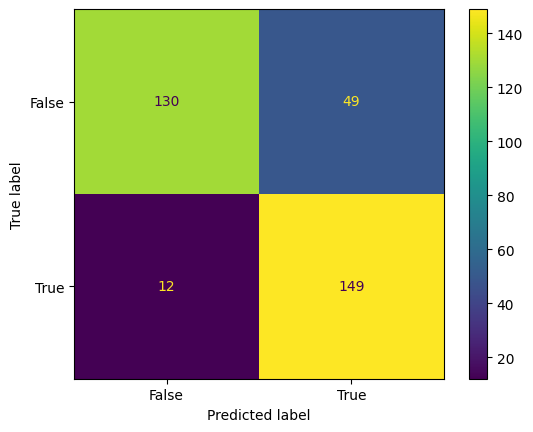

In [47]:
# Plot confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, binary_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Random Forest

In [196]:
from sklearn.model_selection import GridSearchCV

In [198]:
# Extract a summary of the model architecture to report to mlflow easily

def summary_config(model, type):
    model_summary = type+':'
    if type == 'RF':
        model_config = model.get_params()
        criterion = model_config['criterion']
        max_depth = model_config['max_depth']
        n_estimators = model_config['n_estimators']
        # take first letter of type of lyer (so D for dense)
        # take firat 2 letters for activation (so re for relu, si for sigmoid)
        model_summary += f'{criterion}:md{max_depth}:ne{n_estimators}'
    return model_summary

In [199]:
params = {
    'max_depth': [1, 2,3,5,10,15,20,25,30 ,40,80],
    'min_samples_leaf': [2,3,5,7,10,20,50,100,200],
    'n_estimators': [10,25,30,35,40,50,100,200]
}

# Training
with mlflow.start_run():
    # Set tags
    #mlflow.set_tag('Model config', model.get_config())    
    #mlflow.set_tag('Epochs', epochs)
    mlflow.set_tag('Normalization', normalization)
    mlflow.set_tag('Sampling', sampling)
    mlflow.set_tag('Test size', testing_size)

    rf = RandomForestClassifier(random_state=global_seed)

    grid_search = GridSearchCV(estimator=rf,
                            param_grid=params,
                            cv = 4,
                            n_jobs=-1, verbose=1, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    grid_search.best_score_
    model = grid_search.best_estimator_

    mlflow.sklearn.log_model(
        model, 
        artifact_path="sklearn_model",
        registered_model_name="sklearn-RF")
    model_summary = summary_config(model, type='RF')
    mlflow.set_tag("mlflow.runName", model_summary)
    ComputeTestMetrics(model)


Fitting 4 folds for each of 792 candidates, totalling 3168 fits


2023/03/13 15:02:45 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under /data/mlflow/artifacts/48/94dd887ec9784dc49987828aa6a75488/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/03/13 15:02:45 INFO mlflow.sklearn.utils: Logging the 5 best runs, 787 runs will be omitted.
Registered model 'sklearn-RF' already exists. Creating a new version of this model...
2023/03/13 15:02:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-RF, version 7
Created version '7' 

In [144]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)
np.unique(predictions, return_counts=True)
print(classification_report(y_test, predictions, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       179
           1       0.99      1.00      1.00       161

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



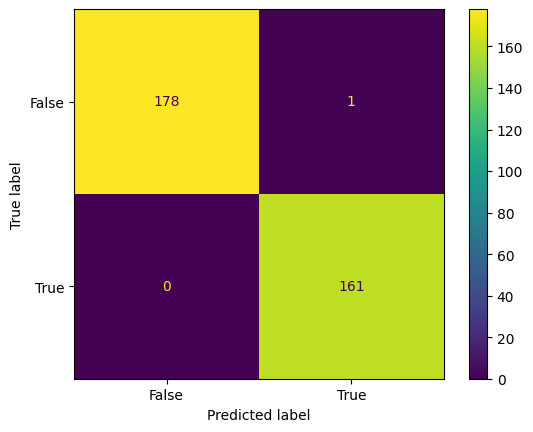

In [145]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

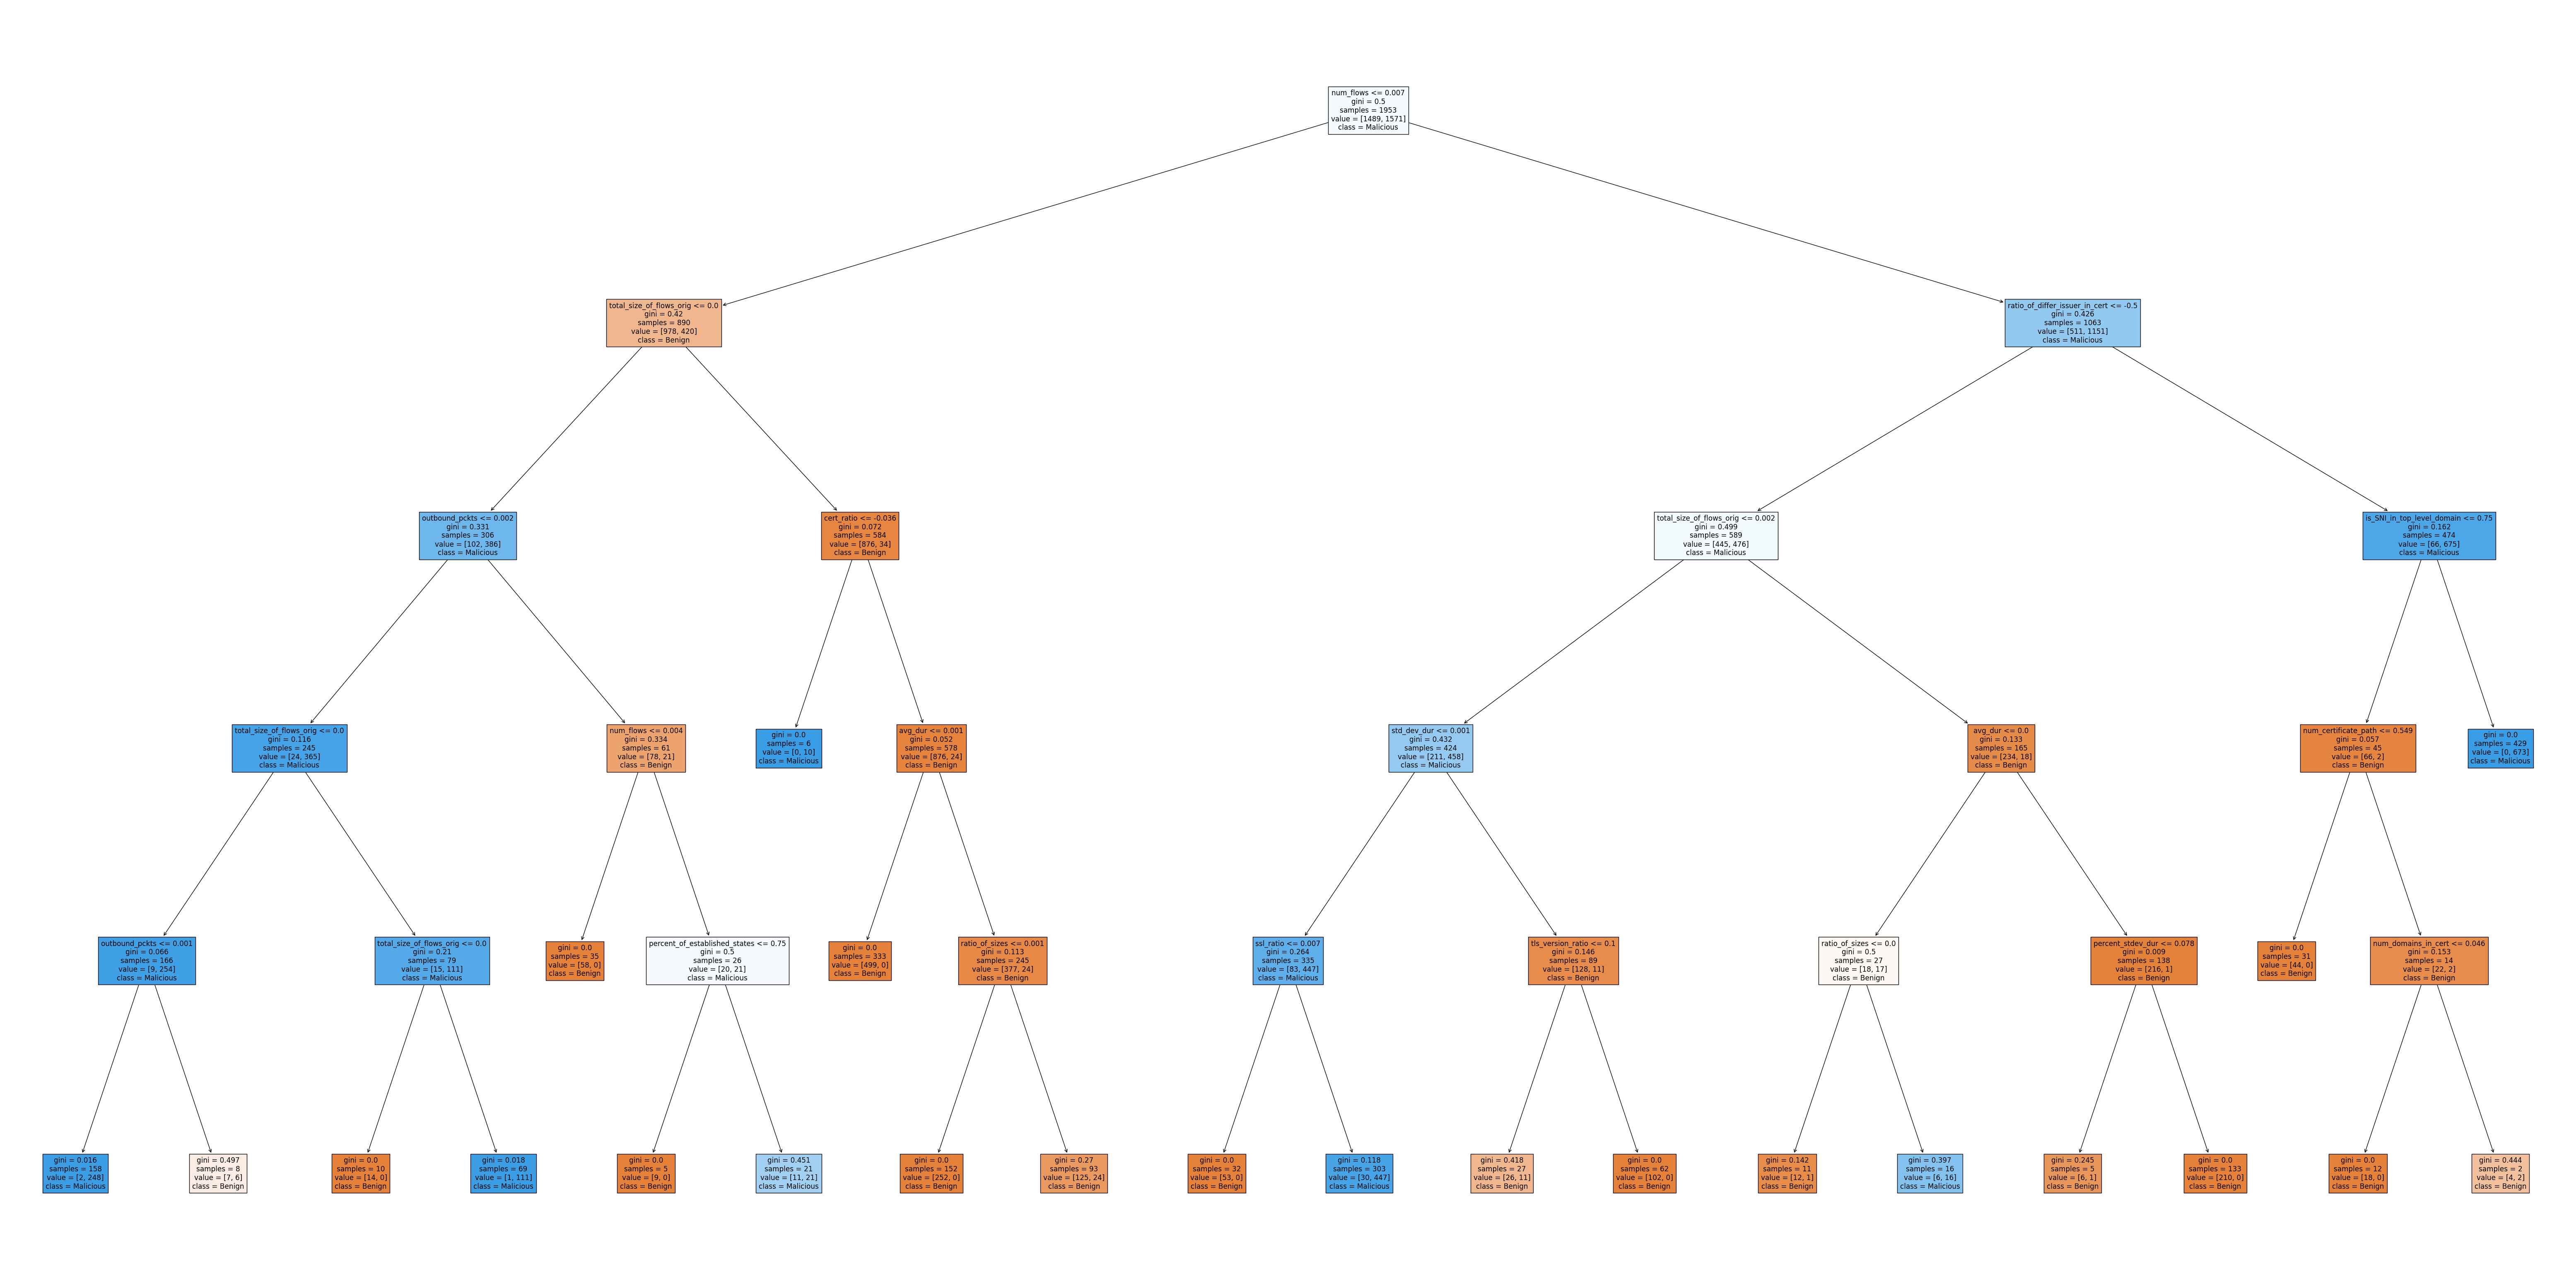

In [162]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model.estimators_[0], feature_names = X_train.columns,class_names=['Benign', "Malicious"],filled=True);
plt.show()

### Feature Importance

In [159]:
# they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
38,is_SNI_in_top_level_domain,0.333819
1,avg_dur,0.124155
20,cert_ratio,0.054157
17,is_valid_certificate_during_capture,0.051213
4,total_size_of_flows_orig,0.045919
0,num_flows,0.043138
9,outbound_pckts,0.041224
2,std_dev_dur,0.030944
5,total_size_of_flows_resp,0.030119
11,periodicity_stdev,0.028718


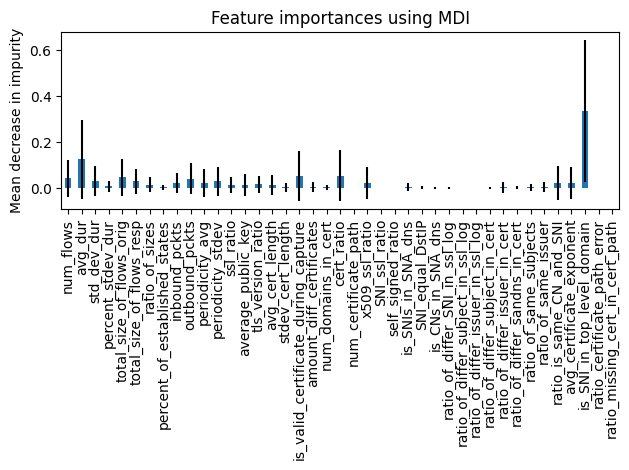

In [164]:
# Plot features importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(model.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()